# Correlation and Simple Linear Regression Tutorial
Learning Objectives
* Calculate a correlation coefficient
* Test for the correaltion coefficient

In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

The electric power consumed each month by a chemical 
plant is thought to be related to the average ambient temperature 
(x1), the number of days in the month (x2 ), the average produc 
purity (x3 ), and the tons of product produced (x4 ). The past years 
historical data are available and are presented below.

In [3]:
power=pd.read_csv('Power.csv')
power

,Power,Temp,NoDays,Purity,Tons
0,240,25,24,91,100
1,236,31,21,90,95
2,270,45,24,88,110
3,274,60,25,87,88
4,301,65,25,91,94
5,316,72,26,94,99
6,300,80,25,87,97
7,296,84,25,86,96
8,267,75,24,88,110
9,276,60,25,91,105


# Step 1:  Create a pairwise scatterplot of the data.  

https://seaborn.pydata.org/generated/seaborn.pairplot.html

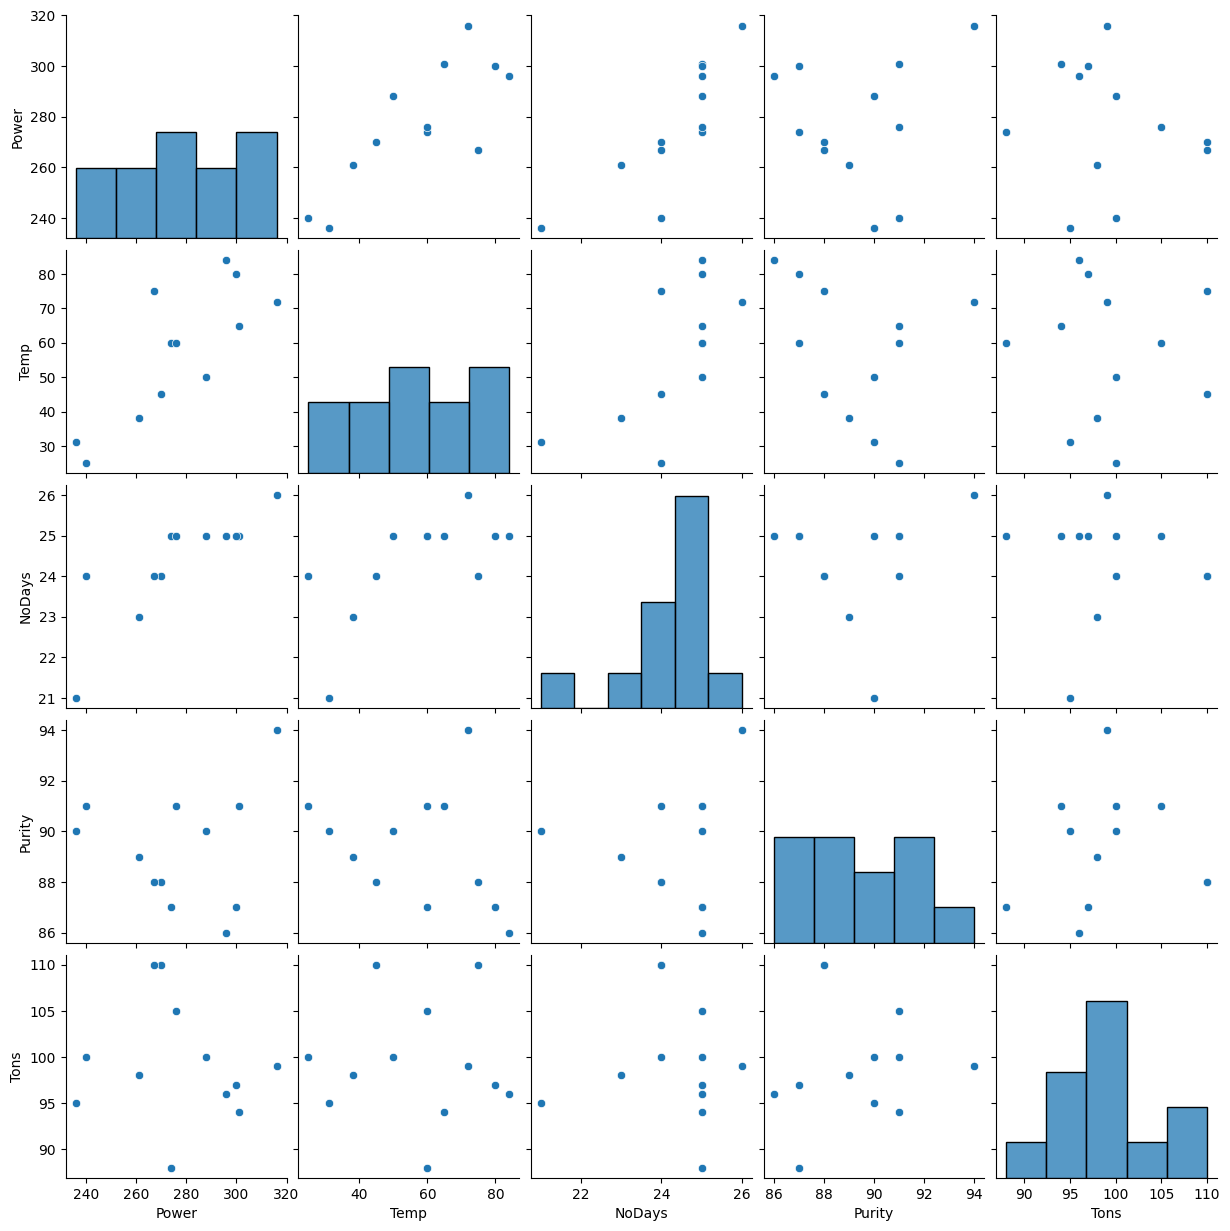

In [7]:
sns.pairplot(data=power)
plt.show()

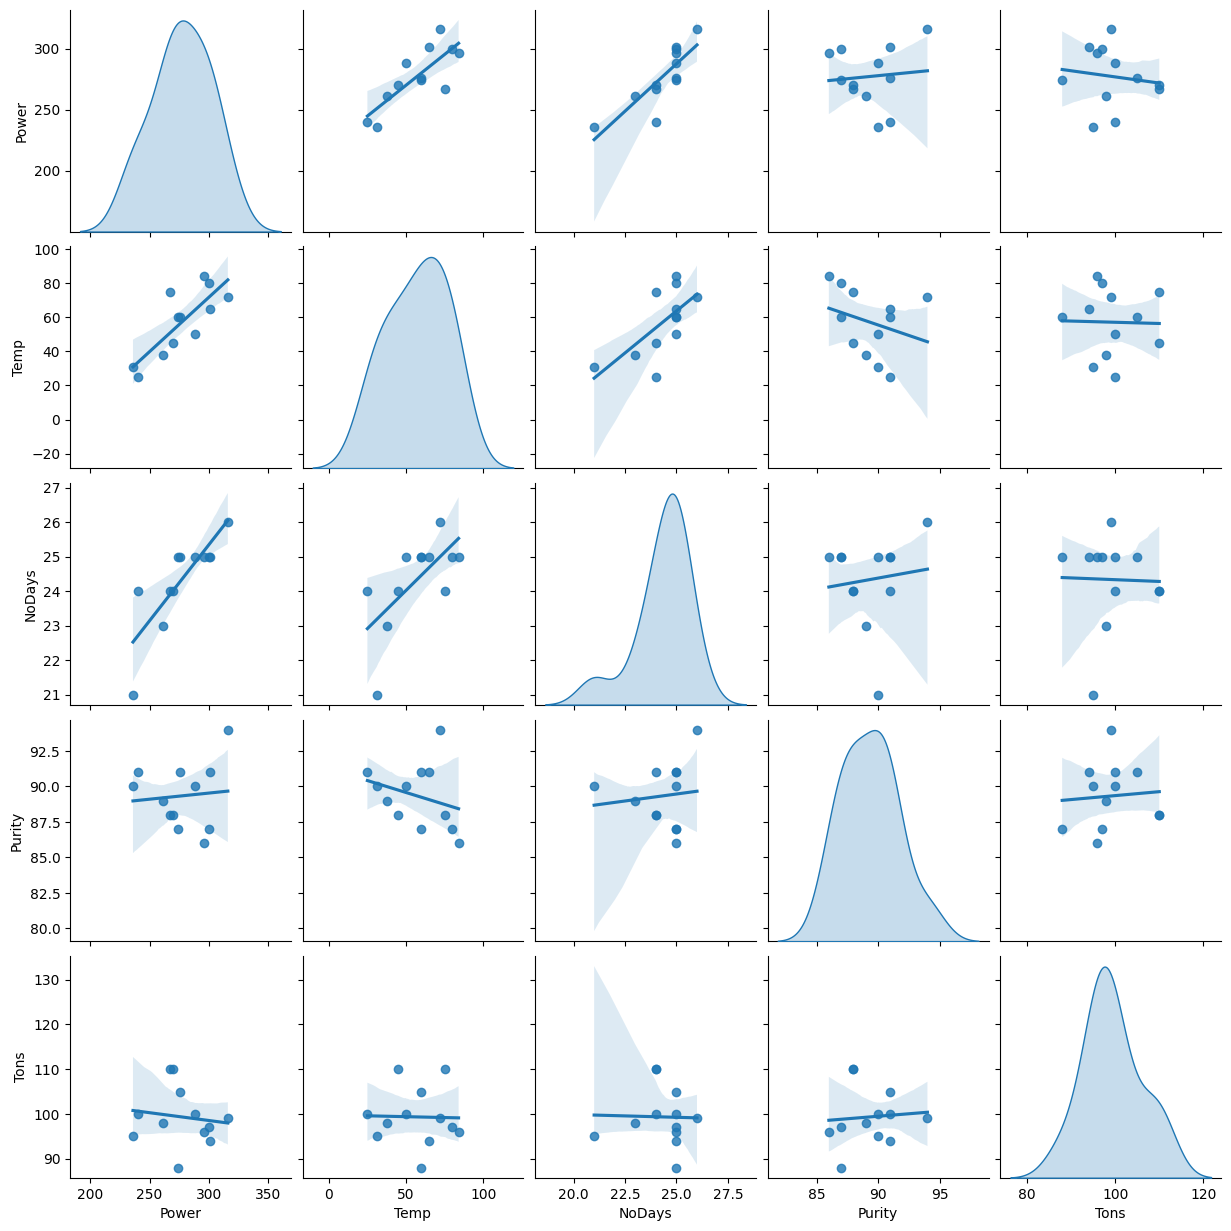

In [9]:
sns.pairplot(data=power, kind='reg', diag_kind='kde')
plt.show()

# Step 2:  Find the correlation matrix for the Power dataset using Python

You can use a Method for the dataframe such as:

name_of_dataframe.cov() for covaraince matrix

name_of_datafram.corr() for correlation matrix

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [11]:
power.cov()

,Power,Temp,NoDays,Purity,Tons
Power,597.537879,380.719697,26.333333,5.151515,-20.848485
Temp,380.719697,376.628788,16.696970,-12.666667,-2.939394
NoDays,26.333333,16.696970,1.696970,0.333333,-0.212121
Purity,5.151515,-12.666667,0.333333,5.151515,1.151515
Tons,-20.848485,-2.939394,-0.212121,1.151515,41.333333


In [10]:
power.corr()

,Power,Temp,NoDays,Purity,Tons
Power,1.000000,0.802538,0.826963,0.092851,-0.132660
Temp,0.802538,1.000000,0.660456,-0.287566,-0.023559
NoDays,0.826963,0.660456,1.000000,0.112739,-0.025328
Purity,0.092851,-0.287566,0.112739,1.000000,0.078914
Tons,-0.132660,-0.023559,-0.025328,0.078914,1.000000


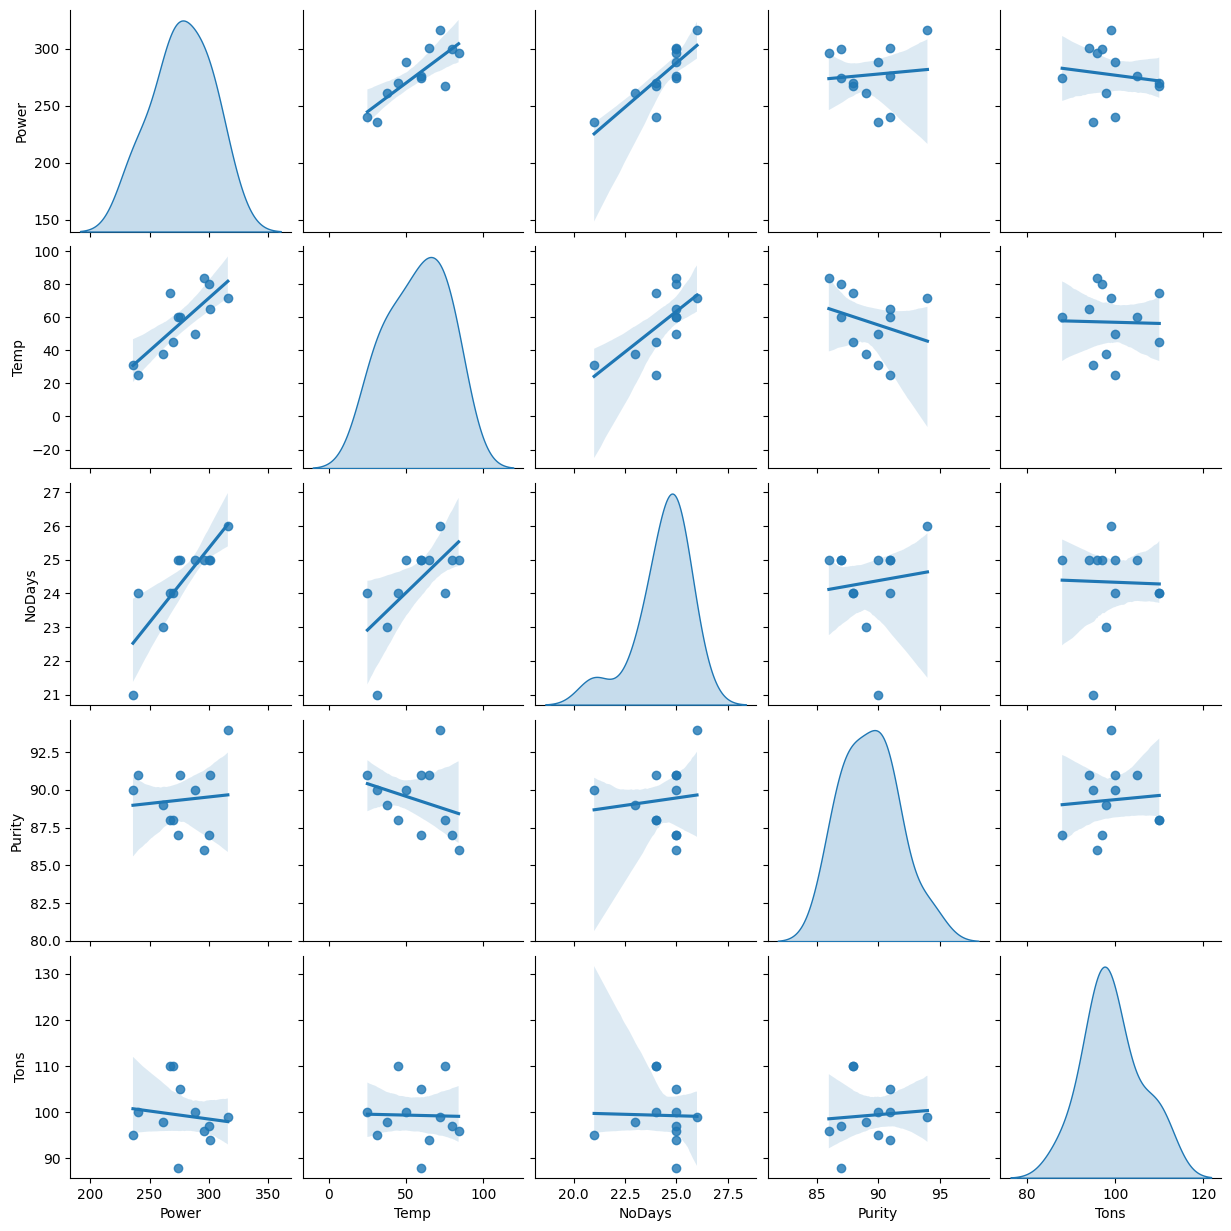

In [12]:
sns.pairplot(data=power, kind='reg', diag_kind='kde')

# Step 3: Choose a variable to create a scatter plot to be the variable for the x-axis with the variable of the y-axis being Power.

Does the graph 
suggest anything about the nature of the relationship between these variables? 

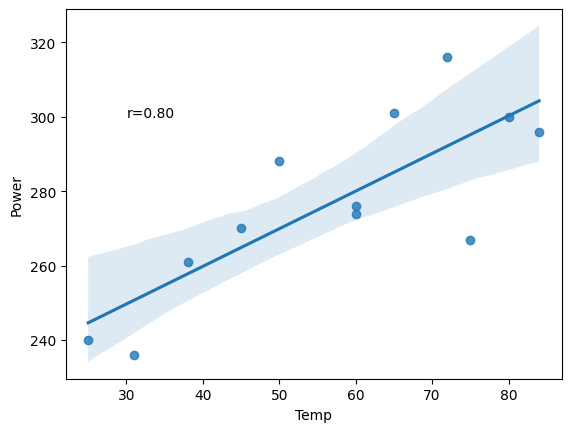

In [17]:
ax = sns.regplot(x=power['Temp'], y=power['Power'], data=power)
ax.annotate(text='r=0.80', xy=(30,300), xycoords='data')
plt.show()

# Step 4:  Calculate the covariance of Power with the x-variable.  

Show the formula and the steps to calculate the covariance by hand.  Show the covariance matrix with python and describe the values in the matrix. What does the covariance show?

np.cov(X,Y) will provide the covariance matrix

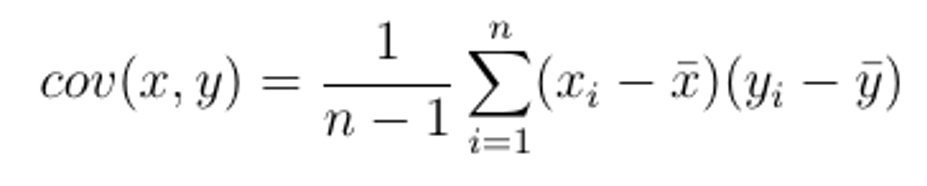

In [18]:
np.cov(power['Temp'], power['Power'])

array([[376.62878788, 380.71969697],
       [380.71969697, 597.53787879]])

In [22]:
# covariance of X, Y
varx = np.sum((power['Temp'] - np.mean(power['Temp']))**2) / (len(power['Temp']) - 1)
vary = np.sum((power['Power'] - np.mean(power['Power']))**2) / (len(power['Power']) - 1)
print(varx, vary)

376.6287878787878 597.5378787878788


In [23]:
sumCrossProduct = np.sum((power['Temp'] - np.mean(power['Temp'])) * (power['Power'] - np.mean(power['Power'])))
Covariance = sumCrossProduct / (len(power['Temp']) - 1)
print(Covariance)

380.71969696969694


# Step 5:  Calculate the correlation of Power with the x-variable. 

np.corrcoef(X,Y) will provide the correlation matrix

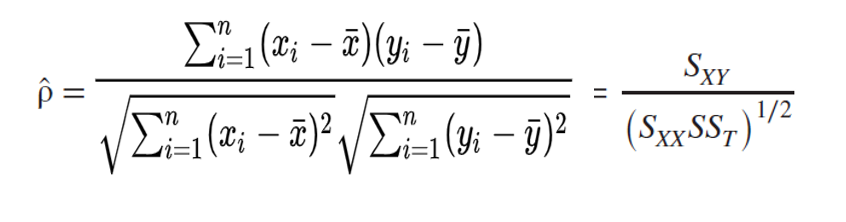es?

In [27]:
np.corrcoef(power['Temp'], power['Power'])

array([[1.        , 0.80253849],
       [0.80253849, 1.        ]])

In [25]:
correlation = Covariance / (np.sqrt(varx) * np.sqrt(vary))
print(correlation)

0.8025384878662984


# Step 6:  Test the null hypothesis that the population correlation equals zero by hand and in python.  

What do you 
conclude? 

Use the Scipy stats.pearsonr(X,Y) to run a Pearson's r test for these two variables.  

t = r$\sqrt{(n-2)/(1-r^2)}$
with n-2 DOF

In [28]:
stats.pearsonr(power['Temp'], power['Power'])

PearsonRResult(statistic=0.8025384878662982, pvalue=0.0016792568604036807)

In [33]:
t = correlation * np.sqrt(len(power['Temp']) - 2) / np.sqrt(1 - correlation**2)
p = 1 - stats.t.cdf(t, len(power['Temp']) - 2)
print(t, p)

4.253851911396434 0.0008396284302017998


In [ ]:
# thus is it statistically significant at 0.05 level, we can reject H0!